<a href="https://colab.research.google.com/github/IEXE-Tec/analisis-descriptivo/blob/master/10_EDA_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## A continuacion te presentamos el dataset de Iris creado por Fisher.

En este proyecto debemos de ser capaces de predecir la especie a la que pertenecen las observaciones dado los atributos de los sepalos y petalos!  

Hagamos uso de las herramientas de visualizacion que hemos aprendido a lo alrgo de este curso!

In [8]:
def print_s():
    print("\n  --------------------------- \n")

def glimpse_df(df):
  print('               Shape             \n')
  print(df.shape)
  print_s()  
  print('               Head              \n')
  print(df.head())
  print_s()  
  print('               Info              \n')
  print(df.info())
  print_s()
  print("              Describe           \n")
  print(df.describe())
  print_s()
  print("                NaN              \n")
  df_ = df[df.isna().any(axis=1)]
  print(df_)

In [9]:
iris = sns.load_dataset('iris')
glimpse_df(iris)

               Shape             

(150, 5)

  --------------------------- 

               Head              

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

  --------------------------- 

               Info              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
m

## El modelo sugerido:  
# specie = f(sepal_length, sepal_width, petal_length, petal_width)

In [20]:
iris.groupby('species').describe()

sepal_length                               ... petal_width                    
                  count   mean       std  min    25%  ...         min  25%  50%  75%  max
species                                               ...                                
setosa             50.0  5.006  0.352490  4.3  4.800  ...         0.1  0.2  0.2  0.3  0.6
versicolor         50.0  5.936  0.516171  4.9  5.600  ...         1.0  1.2  1.3  1.5  1.8
virginica          50.0  6.588  0.635880  4.9  6.225  ...         1.4  1.8  2.0  2.3  2.5

[3 rows x 32 columns]

Podemos observar como al agrupar por especie existe una diferencia entre los estadisticos.

Analizemos la correlacion entre las variables que podemos utilizar para predecir la especie.*italicized text*

In [17]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Analizemos la correlacion entre las variables que podemos utilizar para predecir la especie, pero esta vez separemos por especie. De esta manera podemos visualizar comportamientos particulares.


Parece un poco contra-intuitivo que el largo de los sepales este negativamente relacionado con su ancho. Tratemos de agrupar por especie!

In [19]:
iris.groupby('species').corr()

sepal_length  sepal_width  petal_length  petal_width
species                                                                      
setosa     sepal_length      1.000000     0.742547      0.267176     0.278098
           sepal_width       0.742547     1.000000      0.177700     0.232752
           petal_length      0.267176     0.177700      1.000000     0.331630
           petal_width       0.278098     0.232752      0.331630     1.000000
versicolor sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

Podemos observar como las correlaciones cambian sustancialmente. Ahora todas son positivas!

Observemos las relaciones y distribuciones entre las variables!

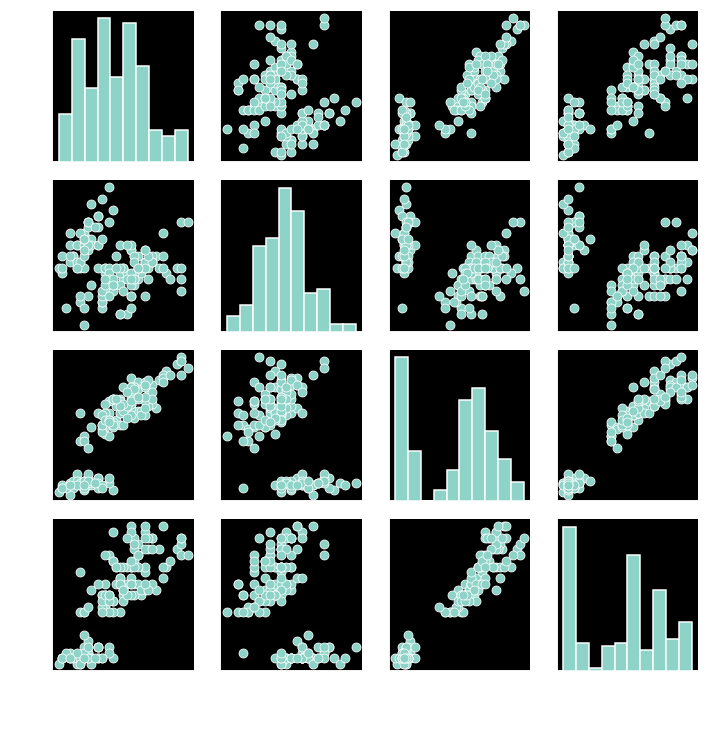

In [25]:
sns.pairplot(iris)

Es un poco dificil distinguir, que esta ocurriendo. Agrupemos por especie!

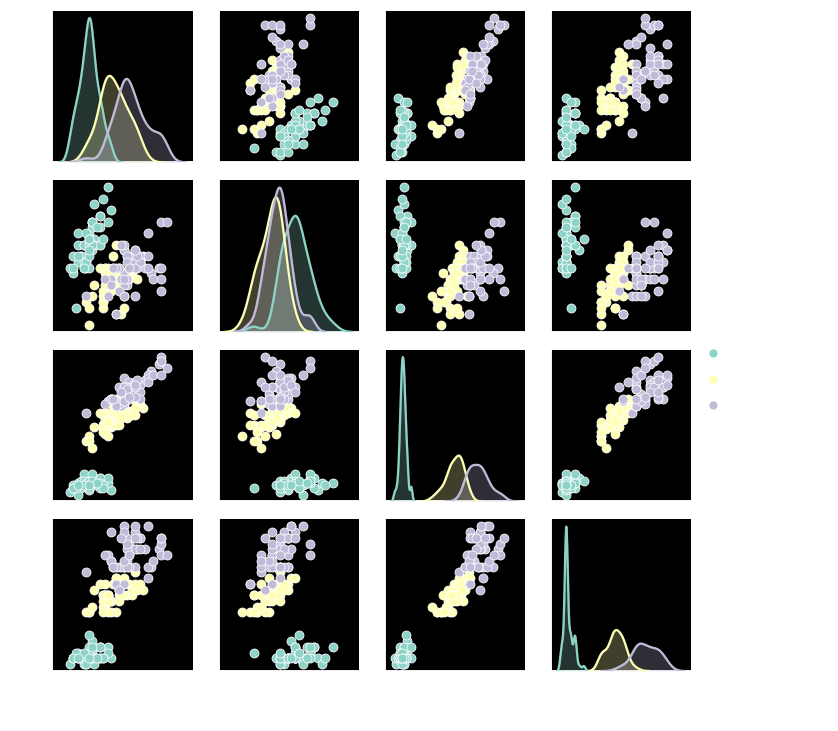

In [23]:
sns.pairplot(iris, hue='species')

# Crees que el proyecto de predecir la especie a partir de las demas variables es viable?